# 1.匯入所需套件

In [1]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.utils import to_categorical

C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

# 2.讀取並整理 Fashion MNSIT 資料集
## 資料前處理 (Data Preprocessing)

In [2]:
name_list = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [3]:
# Load fashion_mnist
from tensorflow.keras.datasets import fashion_mnist
(x_train_0, y_train_0), (x_test_0, y_test_0) = fashion_mnist.load_data()

# 1 stands for one channel(greyscale)
# Normalize the range of features
x_train = x_train_0.reshape(60000, 28, 28, 1) / x_train_0.max()
x_test = x_test_0.reshape(10000, 28, 28, 1) / x_test_0.max()

# One-hot encoding
y_train = to_categorical(y_train_0, 10)
y_test = to_categorical(y_test_0, 10)

## 檢視測試資料

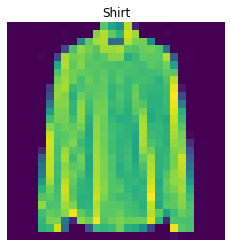

In [4]:
demo = np.random.randint(x_train_0.shape[0])
x_sample = x_train_0[demo]
y_sample = y_train_0[demo].squeeze()

plt.imshow(x_sample)
plt.title(name_list[y_sample])
plt.axis('off');

In [5]:
print(x_train.shape, x_test.shape, sep="\n")

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# 3.建立 Fashion MNSIT 的 CNN 模型

In [6]:
CNN_layers = [Conv2D(16, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu', name='Conv_1'),
              MaxPooling2D(pool_size = (2,2)),
              Conv2D(32, (5, 5), padding='same', activation='relu', name='Conv_2'),
              MaxPooling2D(pool_size = (2,2)),
              Conv2D(64, (5, 5), padding='same', activation='relu', name='Conv_3'),
              MaxPooling2D(pool_size = (2,2)),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_4'),
              MaxPooling2D(pool_size = (2,2))]


FC_layers = [Dropout(0.25),
             Flatten(),
             Dense(units=128, activation='relu'),
             Dense(units=10, activation='softmax')]

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model = Sequential(CNN_layers + FC_layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
Conv_4 (Conv2D)              (None, 3, 3, 128)         7

## 編譯模型: 設定模型訓練
### Optimizer: Adam
### Loss: categorical cross-entropy

In [8]:
#組裝神經網路
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(),
              metrics=['categorical_accuracy'])

# 4.模型訓練

In [9]:
model.fit(x_train, y_train, 
          batch_size=128, 
          epochs=5,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 42s 706us/sample - loss: 0.6296 - categorical_accuracy: 0.7674 - val_loss: 0.4071 - val_categorical_accuracy: 0.8521
Epoch 2/5
60000/60000 [==============================] - 40s 667us/sample - loss: 0.3651 - categorical_accuracy: 0.8670 - val_loss: 0.3481 - val_categorical_accuracy: 0.8727
Epoch 3/5
60000/60000 [==============================] - 40s 665us/sample - loss: 0.3064 - categorical_accuracy: 0.8890 - val_loss: 0.2927 - val_categorical_accuracy: 0.8920
Epoch 4/5
60000/60000 [==============================] - 40s 666us/sample - loss: 0.2728 - categorical_accuracy: 0.9004 - val_loss: 0.2904 - val_categorical_accuracy: 0.8923
Epoch 5/5
60000/60000 [==============================] - 40s 665us/sample - loss: 0.2458 - categorical_accuracy: 0.9097 - val_loss: 0.2607 - val_categorical_accuracy: 0.9055


In [10]:
model.save_weights('CNN_Try_1')

# 5.模型預測: 預測資料集的準確率

In [11]:
model.load_weights('CNN_Try_1')
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 2s 191us/sample - loss: 0.2607 - categorical_accuracy: 0.9055
Train Accuracy: 92.3200011253357
Test Accuracy: 90.54999947547913


In [12]:
num_list = ['0','1','2','3','4','5','6','7','8','9']

# 遷移學習 (Transfer Learning)
# 1.讀入整理 MNIST 資料集

In [13]:
# Load MNIST
(u_train_0, v_train_0), (u_test_0, v_test_0) = mnist.load_data()

# Normalize the range of features
u_train = u_train_0.reshape(60000, 28, 28, 1) / u_train_0.max()
u_test = u_test_0.reshape(10000, 28, 28, 1) / u_test_0.max()

# One-hot encoding
v_train = to_categorical(v_train_0, 10)
v_test = to_categorical(v_test_0, 10)

## 檢視測試資料

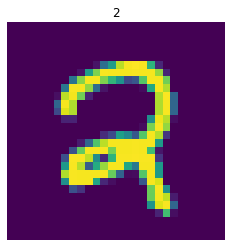

In [26]:
demo = np.random.randint(u_train_0.shape[0])
u_sample = u_train_0[demo]
v_sample = v_train_0[demo].squeeze()

plt.imshow(u_sample)
plt.title(num_list[v_sample])
plt.axis('off');

# 2. Layer transfer

In [15]:
# New FC layers for MNIST
FC_layers_mnist = [Flatten(),
                   Dense(units=256, activation='relu'),
                   Dense(units=128, activation='relu'),
                   Dense(units=64, activation='relu'),
                   Dense(units=10, activation='softmax')]

In [16]:
model_mnist = Sequential(CNN_layers+FC_layers_mnist)
model_mnist.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
Conv_4 (Conv2D)              (None, 3, 3, 128)        

## 遷移學習的訓練方式
### Frozen: 當新資料集的樣本數不夠多，凍結借來的部分，只針對新建立的神經網路層訓練
### Fine-tune: 新資料集的樣本數夠多，整個模型重新訓練

# 3. 採 Frozen 的訓練方式

In [17]:
# Frozen
for layer in CNN_layers:
    layer.trainable = False

In [18]:
model_mnist.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
Conv_4 (Conv2D)              (None, 3, 3, 128)        

In [19]:
model_mnist.compile(loss='categorical_crossentropy', 
                    optimizer=Adam(),
                    metrics=['categorical_accuracy'])

# 4.模型訓練

In [20]:
model_mnist.fit(u_train, v_train,
                batch_size=256, 
                epochs=5,
                validation_data=(u_test, v_test)
                )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 188us/sample - loss: 0.5682 - categorical_accuracy: 0.8286 - val_loss: 0.2714 - val_categorical_accuracy: 0.9139
Epoch 2/5
60000/60000 [==============================] - 11s 189us/sample - loss: 0.2631 - categorical_accuracy: 0.9155 - val_loss: 0.2229 - val_categorical_accuracy: 0.9300
Epoch 3/5
60000/60000 [==============================] - 11s 189us/sample - loss: 0.2212 - categorical_accuracy: 0.9286 - val_loss: 0.1991 - val_categorical_accuracy: 0.9335
Epoch 4/5
60000/60000 [==============================] - 11s 189us/sample - loss: 0.1959 - categorical_accuracy: 0.9363 - val_loss: 0.1902 - val_categorical_accuracy: 0.9375
Epoch 5/5
60000/60000 [==============================] - 12s 205us/sample - loss: 0.1765 - categorical_accuracy: 0.9427 - val_loss: 0.1806 - val_categorical_accuracy: 0.9425


# 5. 被借來的部分會被影響嗎？使用 Frozen 時
## 結果為不受影響

In [21]:
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 2s 199us/sample - loss: 0.2607 - categorical_accuracy: 0.9055
Train Accuracy: 92.3200011253357
Test Accuracy: 90.54999947547913


# 6.採 Fine-tune 的訓練方式

In [22]:
# Fine-tune
for layer in CNN_layers:
    layer.trainable = True

In [23]:
model_mnist.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
Conv_4 (Conv2D)              (None, 3, 3, 128)        

In [24]:
model_mnist.fit(u_train, v_train,
                batch_size=256, 
                epochs=5,
                validation_data=(u_test, v_test)
                )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 190us/sample - loss: 0.1628 - categorical_accuracy: 0.9464 - val_loss: 0.1631 - val_categorical_accuracy: 0.9481
Epoch 2/5
60000/60000 [==============================] - 11s 189us/sample - loss: 0.1535 - categorical_accuracy: 0.9497 - val_loss: 0.1660 - val_categorical_accuracy: 0.9473
Epoch 3/5
60000/60000 [==============================] - 11s 190us/sample - loss: 0.1371 - categorical_accuracy: 0.9552 - val_loss: 0.1587 - val_categorical_accuracy: 0.9502
Epoch 4/5
60000/60000 [==============================] - 12s 194us/sample - loss: 0.1316 - categorical_accuracy: 0.9569 - val_loss: 0.1856 - val_categorical_accuracy: 0.9402
Epoch 5/5
60000/60000 [==============================] - 11s 189us/sample - loss: 0.1220 - categorical_accuracy: 0.9587 - val_loss: 0.1533 - val_categorical_accuracy: 0.9511


# 7. 被借來的部分會被影響嗎？使用 Fine-tune 時
## 結果仍為不受影響，不確定是否正確(?

In [25]:
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 2s 195us/sample - loss: 0.2607 - categorical_accuracy: 0.9055
Train Accuracy: 92.3200011253357
Test Accuracy: 90.54999947547913
